<a href="https://colab.research.google.com/github/BahruzHuseynov/Portfolio/blob/main/Deep_Learning_Projects/Bachelor_Graduation_Work/Bird_Recognition_Pre_Trained_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install efficientnet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=52a4ee4496061febf97c8df86af38a82a0bbc06120de0bcdf15bbdf013911099
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# To ignore possible warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all necessary libraries used in the code
import numpy as np  
import pandas as pd
from PIL import Image  

import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.models as models
from efficientnet_pytorch import EfficientNet
from torchvision.transforms import functional as F

# About the dataset
<p style = "text-align: justify;">
Generally, the dataset contains 200 various bird species with 50-60 images per class and total number of images is 11.8k. The shape of each image differs from each other significantly, for example, 3x300x500, 3x337x400, 3x400x500 and so on. 
</p>

# About the model. 
<p style = "text-align: justify;">
In this notebook, I have only used pre-trained model.
</p>

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=200)
model.train() # Look at the architecture of the model

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:12<00:00, 1.69MB/s]

Loaded pretrained weights for efficientnet-b0


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=200)
model.train() # Look at the architecture of the model

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 142MB/s]


Loaded pretrained weights for efficientnet-b1


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

## Initial two models -  Model 1 and Model 2 are just used to understand the structure, what affects the model performance and for some other points.

# Model 1 - Fine Tuning

#### Making a dataset from the directory in Google Drive. In this dataset, there are only 20 images per each class and center crop has been applied on all of them. 

In [ ]:
data_dir = "./drive/MyDrive/created_dataset"

transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)

#### Splitting dataset into training, test and validation (the dataset is splitted in fully shuffled way, there can be even all images of a class in the training) 

In [ ]:
train_size = int(0.8 * len(dataset)) 
if len(dataset) % 2 == 1:
  train_size += 1
val_size = (len(dataset)-train_size)//2 # 0.1
test_size = (len(dataset)-train_size)//2 # 0.1
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
print(f"Train dataset size: {train_size}")
print(f"Validation dataset size: {val_size}")
print(f"Test dataset size: {test_size}")
print(f"Entire dataset size: {len(dataset)}")

Train dataset size: 3200
Validation dataset size: 400
Test dataset size: 400
Entire dataset size: 4000


#### Checking the number of samples in training, test and validation datasets

In [7]:
# General function to find the number of samples in dataset
def sample_count(indices, all_targets):
  dct = {}
  for i in indices:
    x = all_targets[i]
    if x in dct.keys():
      dct[x] += 1
    else:
      dct[x] = 1

  for i in sorted(dct.keys()):
    print(f"{i} -> {dct[i]}")

In [ ]:
# Training samples
sample_count(train_dataset.indices)

0 -> 16
1 -> 17
2 -> 17
3 -> 15
4 -> 13
5 -> 12
6 -> 19
7 -> 17
8 -> 18
9 -> 16
10 -> 14
11 -> 16
12 -> 19
13 -> 16
14 -> 15
15 -> 16
16 -> 18
17 -> 17
18 -> 13
19 -> 18
20 -> 18
21 -> 19
22 -> 13
23 -> 15
24 -> 16
25 -> 17
26 -> 14
27 -> 16
28 -> 17
29 -> 12
30 -> 15
31 -> 16
32 -> 17
33 -> 13
34 -> 16
35 -> 17
36 -> 12
37 -> 16
38 -> 11
39 -> 14
40 -> 18
41 -> 13
42 -> 15
43 -> 14
44 -> 18
45 -> 15
46 -> 18
47 -> 15
48 -> 19
49 -> 16
50 -> 19
51 -> 18
52 -> 15
53 -> 13
54 -> 13
55 -> 17
56 -> 18
57 -> 17
58 -> 15
59 -> 18
60 -> 17
61 -> 17
62 -> 17
63 -> 17
64 -> 16
65 -> 15
66 -> 18
67 -> 16
68 -> 14
69 -> 19
70 -> 12
71 -> 17
72 -> 16
73 -> 18
74 -> 18
75 -> 15
76 -> 15
77 -> 17
78 -> 14
79 -> 17
80 -> 18
81 -> 12
82 -> 13
83 -> 16
84 -> 16
85 -> 16
86 -> 17
87 -> 15
88 -> 16
89 -> 15
90 -> 19
91 -> 16
92 -> 19
93 -> 17
94 -> 18
95 -> 19
96 -> 15
97 -> 15
98 -> 18
99 -> 16
100 -> 18
101 -> 17
102 -> 18
103 -> 16
104 -> 19
105 -> 14
106 -> 17
107 -> 16
108 -> 18
109 -> 17
110 -> 16


In [ ]:
# Validation samples
sample_count(val_dataset.indices)

0 -> 2
1 -> 2
2 -> 2
3 -> 3
4 -> 2
5 -> 2
6 -> 1
7 -> 1
8 -> 1
9 -> 2
10 -> 2
11 -> 2
13 -> 2
14 -> 3
15 -> 2
16 -> 2
17 -> 2
18 -> 2
19 -> 2
20 -> 1
21 -> 1
22 -> 2
23 -> 2
24 -> 1
25 -> 2
26 -> 3
28 -> 3
29 -> 3
30 -> 1
31 -> 1
32 -> 2
33 -> 3
34 -> 1
35 -> 1
36 -> 4
37 -> 2
38 -> 6
39 -> 4
40 -> 2
41 -> 5
42 -> 3
43 -> 4
44 -> 1
45 -> 1
46 -> 2
47 -> 4
48 -> 1
49 -> 3
50 -> 1
52 -> 4
53 -> 3
54 -> 3
56 -> 1
57 -> 2
58 -> 3
60 -> 1
61 -> 1
62 -> 1
63 -> 3
64 -> 3
65 -> 3
67 -> 3
68 -> 2
70 -> 2
71 -> 1
72 -> 1
73 -> 1
74 -> 2
75 -> 3
76 -> 3
77 -> 2
78 -> 4
80 -> 1
81 -> 4
82 -> 3
83 -> 1
84 -> 4
85 -> 2
86 -> 2
87 -> 3
88 -> 3
89 -> 2
91 -> 3
96 -> 4
97 -> 3
98 -> 1
99 -> 3
100 -> 2
101 -> 2
103 -> 3
104 -> 1
105 -> 3
107 -> 3
109 -> 2
110 -> 1
111 -> 2
112 -> 2
113 -> 1
114 -> 1
115 -> 1
116 -> 2
117 -> 4
118 -> 3
119 -> 1
120 -> 2
121 -> 4
122 -> 1
123 -> 2
124 -> 3
125 -> 1
126 -> 4
127 -> 1
129 -> 4
130 -> 2
131 -> 1
132 -> 1
136 -> 3
137 -> 2
138 -> 1
139 -> 2
140 -> 1
141 -> 1

In [5]:
# Set up data loaders for each set
def loaders(batch_size, train_dataset, val_dataset, test_dataset):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    return train_loader, val_loader, test_loader

In [ ]:
train_loader, val_loader, test_loader = loaders(8, train_dataset, val_dataset, test_dataset)

#### Model, optimizer and loss

In [ ]:
# Load pre-trained model
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=200)

# Set up optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 114MB/s] 


Loaded pretrained weights for efficientnet-b0


#### Training
#### Validation has not been used

In [ ]:
# Train the model
num_epochs = 8
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
     
    for i, (batch, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs} | Train loss: {epoch_loss:.4f} | Train accuracy: {epoch_acc:.4f}')

Epoch 1/8 | Train loss: 0.5500 | Train accuracy: 0.0819
Epoch 2/8 | Train loss: 0.3340 | Train accuracy: 0.3328
Epoch 3/8 | Train loss: 0.2116 | Train accuracy: 0.5397
Epoch 4/8 | Train loss: 0.1452 | Train accuracy: 0.6750
Epoch 5/8 | Train loss: 0.0954 | Train accuracy: 0.7850
Epoch 6/8 | Train loss: 0.0685 | Train accuracy: 0.8444
Epoch 7/8 | Train loss: 0.0550 | Train accuracy: 0.8762
Epoch 8/8 | Train loss: 0.0406 | Train accuracy: 0.9122


#### Test

In [ ]:
model.eval()
test_running_loss = 0.0
test_running_corrects = 0

with torch.no_grad():
    for batch, labels in test_loader:
        outputs = model(batch)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        test_running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        test_running_corrects += torch.sum(preds == labels.data)

test_epoch_loss = test_running_loss / len(test_dataset)
test_epoch_acc = test_running_corrects.double() / len(test_dataset)
print(f'Test loss: {test_epoch_loss:.4f} | Test accuracy: {test_epoch_acc:.4f}')

Test loss: 0.6618 | Test accuracy: 0.5125


# Model 2 - Fine Tuning

#### Same dataset but stratified dataset splitting (16 images in the training dataset, 2 images in the test and 2 images in the validation dataset for each class) 
#### Same optimizer, learning rate, model and same loss function

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

def train_test_validation(dataset, targets):
    stratified_split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2)

    for train_indices, indices in stratified_split.split(dataset, targets):
        train_dataset = torch.utils.data.Subset(dataset, train_indices)
        
        dct_val = {}
        dct_test = {}
        val_indices = []
        test_indices = []

        for i in indices:
            x = targets[i]

            if x not in dct_val.keys():
                dct_val[x] = 1
                val_indices.append(i)
            elif x in dct_val.keys() and dct_val[x] == 1:
                dct_val[x] += 1
                val_indices.append(i)
            else:
                test_indices.append(i)
                if x in dct_test.keys():
                    dct_test[x] += 1
                else:
                    dct_test[x] = 1

        test_dataset = torch.utils.data.Subset(dataset, test_indices)
        val_dataset = torch.utils.data.Subset(dataset, val_indices)
    return train_dataset, test_dataset, val_dataset

In [ ]:
train_dataset, test_dataset, val_dataset = train_test_validation(dataset, dataset.targets)

In [ ]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Entire dataset size: {len(dataset)}")

Train dataset size: 3200
Validation dataset size: 400
Test dataset size: 400
Entire dataset size: 4000


In [ ]:
# Training samples
sample_count(train_dataset.indices)

0 -> 16
1 -> 16
2 -> 16
3 -> 16
4 -> 16
5 -> 16
6 -> 16
7 -> 16
8 -> 16
9 -> 16
10 -> 16
11 -> 16
12 -> 16
13 -> 16
14 -> 16
15 -> 16
16 -> 16
17 -> 16
18 -> 16
19 -> 16
20 -> 16
21 -> 16
22 -> 16
23 -> 16
24 -> 16
25 -> 16
26 -> 16
27 -> 16
28 -> 16
29 -> 16
30 -> 16
31 -> 16
32 -> 16
33 -> 16
34 -> 16
35 -> 16
36 -> 16
37 -> 16
38 -> 16
39 -> 16
40 -> 16
41 -> 16
42 -> 16
43 -> 16
44 -> 16
45 -> 16
46 -> 16
47 -> 16
48 -> 16
49 -> 16
50 -> 16
51 -> 16
52 -> 16
53 -> 16
54 -> 16
55 -> 16
56 -> 16
57 -> 16
58 -> 16
59 -> 16
60 -> 16
61 -> 16
62 -> 16
63 -> 16
64 -> 16
65 -> 16
66 -> 16
67 -> 16
68 -> 16
69 -> 16
70 -> 16
71 -> 16
72 -> 16
73 -> 16
74 -> 16
75 -> 16
76 -> 16
77 -> 16
78 -> 16
79 -> 16
80 -> 16
81 -> 16
82 -> 16
83 -> 16
84 -> 16
85 -> 16
86 -> 16
87 -> 16
88 -> 16
89 -> 16
90 -> 16
91 -> 16
92 -> 16
93 -> 16
94 -> 16
95 -> 16
96 -> 16
97 -> 16
98 -> 16
99 -> 16
100 -> 16
101 -> 16
102 -> 16
103 -> 16
104 -> 16
105 -> 16
106 -> 16
107 -> 16
108 -> 16
109 -> 16
110 -> 16


In [ ]:
# Test samples
sample_count(test_dataset.indices)

0 -> 2
1 -> 2
2 -> 2
3 -> 2
4 -> 2
5 -> 2
6 -> 2
7 -> 2
8 -> 2
9 -> 2
10 -> 2
11 -> 2
12 -> 2
13 -> 2
14 -> 2
15 -> 2
16 -> 2
17 -> 2
18 -> 2
19 -> 2
20 -> 2
21 -> 2
22 -> 2
23 -> 2
24 -> 2
25 -> 2
26 -> 2
27 -> 2
28 -> 2
29 -> 2
30 -> 2
31 -> 2
32 -> 2
33 -> 2
34 -> 2
35 -> 2
36 -> 2
37 -> 2
38 -> 2
39 -> 2
40 -> 2
41 -> 2
42 -> 2
43 -> 2
44 -> 2
45 -> 2
46 -> 2
47 -> 2
48 -> 2
49 -> 2
50 -> 2
51 -> 2
52 -> 2
53 -> 2
54 -> 2
55 -> 2
56 -> 2
57 -> 2
58 -> 2
59 -> 2
60 -> 2
61 -> 2
62 -> 2
63 -> 2
64 -> 2
65 -> 2
66 -> 2
67 -> 2
68 -> 2
69 -> 2
70 -> 2
71 -> 2
72 -> 2
73 -> 2
74 -> 2
75 -> 2
76 -> 2
77 -> 2
78 -> 2
79 -> 2
80 -> 2
81 -> 2
82 -> 2
83 -> 2
84 -> 2
85 -> 2
86 -> 2
87 -> 2
88 -> 2
89 -> 2
90 -> 2
91 -> 2
92 -> 2
93 -> 2
94 -> 2
95 -> 2
96 -> 2
97 -> 2
98 -> 2
99 -> 2
100 -> 2
101 -> 2
102 -> 2
103 -> 2
104 -> 2
105 -> 2
106 -> 2
107 -> 2
108 -> 2
109 -> 2
110 -> 2
111 -> 2
112 -> 2
113 -> 2
114 -> 2
115 -> 2
116 -> 2
117 -> 2
118 -> 2
119 -> 2
120 -> 2
121 -> 2
122 -> 2
123

In [ ]:
batch_size = 16
train_loader, val_loader, test_loader = loaders(8, train_dataset, val_dataset, test_dataset)

#### Training
#### Validation has not been used

In [ ]:
num_epochs = 8
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
     
    for i, (batch, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs} | Train loss: {epoch_loss:.4f} | Train accuracy: {epoch_acc:.4f}')

Epoch 1/8 | Train loss: 0.2530 | Train accuracy: 0.1378
Epoch 2/8 | Train loss: 0.1237 | Train accuracy: 0.4788
Epoch 3/8 | Train loss: 0.0693 | Train accuracy: 0.6850
Epoch 4/8 | Train loss: 0.0373 | Train accuracy: 0.8434
Epoch 5/8 | Train loss: 0.0231 | Train accuracy: 0.9081
Epoch 6/8 | Train loss: 0.0184 | Train accuracy: 0.9200
Epoch 7/8 | Train loss: 0.0111 | Train accuracy: 0.9587
Epoch 8/8 | Train loss: 0.0109 | Train accuracy: 0.9534


#### Test - Accuracy increased approximately 6%, but it is again not satisfactory.

In [ ]:
model.eval()
test_running_loss = 0.0
test_running_corrects = 0

with torch.no_grad():
    for batch, labels in test_loader:
        outputs = model(batch)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        test_running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        test_running_corrects += torch.sum(preds == labels.data)

test_epoch_loss = test_running_loss / len(test_dataset)
test_epoch_acc = test_running_corrects.double() / len(test_dataset)
print(f'Test loss: {test_epoch_loss:.4f} | Test accuracy: {test_epoch_acc:.4f}')

Test loss: 0.2531 | Test accuracy: 0.5725


# Model 3.

#### This time, all images with original shape will be used; however, Resize(300,300) will be applied which makes changes on resolution and in some cases use cropping. The number of images per class won't change. Dataset consists of 4000 images.


In [ ]:
data_dir = "./drive/MyDrive/created_dataset2"

transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)

In [ ]:
train_dataset, test_dataset, val_dataset = train_test_validation(dataset, dataset.targets)

In [ ]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Entire dataset size: {len(dataset)}")

Train dataset size: 3200
Validation dataset size: 400
Test dataset size: 400
Entire dataset size: 4000


In [ ]:
# Test samples
sample_count(test_dataset.indices, test_dataset.dataset.targets)

0 -> 2
1 -> 2
2 -> 2
3 -> 2
4 -> 2
5 -> 2
6 -> 2
7 -> 2
8 -> 2
9 -> 2
10 -> 2
11 -> 2
12 -> 2
13 -> 2
14 -> 2
15 -> 2
16 -> 2
17 -> 2
18 -> 2
19 -> 2
20 -> 2
21 -> 2
22 -> 2
23 -> 2
24 -> 2
25 -> 2
26 -> 2
27 -> 2
28 -> 2
29 -> 2
30 -> 2
31 -> 2
32 -> 2
33 -> 2
34 -> 2
35 -> 2
36 -> 2
37 -> 2
38 -> 2
39 -> 2
40 -> 2
41 -> 2
42 -> 2
43 -> 2
44 -> 2
45 -> 2
46 -> 2
47 -> 2
48 -> 2
49 -> 2
50 -> 2
51 -> 2
52 -> 2
53 -> 2
54 -> 2
55 -> 2
56 -> 2
57 -> 2
58 -> 2
59 -> 2
60 -> 2
61 -> 2
62 -> 2
63 -> 2
64 -> 2
65 -> 2
66 -> 2
67 -> 2
68 -> 2
69 -> 2
70 -> 2
71 -> 2
72 -> 2
73 -> 2
74 -> 2
75 -> 2
76 -> 2
77 -> 2
78 -> 2
79 -> 2
80 -> 2
81 -> 2
82 -> 2
83 -> 2
84 -> 2
85 -> 2
86 -> 2
87 -> 2
88 -> 2
89 -> 2
90 -> 2
91 -> 2
92 -> 2
93 -> 2
94 -> 2
95 -> 2
96 -> 2
97 -> 2
98 -> 2
99 -> 2
100 -> 2
101 -> 2
102 -> 2
103 -> 2
104 -> 2
105 -> 2
106 -> 2
107 -> 2
108 -> 2
109 -> 2
110 -> 2
111 -> 2
112 -> 2
113 -> 2
114 -> 2
115 -> 2
116 -> 2
117 -> 2
118 -> 2
119 -> 2
120 -> 2
121 -> 2
122 -> 2
123

In [ ]:
batch_size = 32
train_loader, val_loader, test_loader = loaders(batch_size, train_dataset, val_dataset, test_dataset)

#### Moreover, now the device module will be assigned to GPU.

In [11]:
def is_there_GPU():
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print("There is a GPU available.")
    else:
        device = torch.device("cpu")
        print("There is no GPU available, using CPU instead.")
    return device

In [12]:
device = is_there_GPU()

There is a GPU available.


#### Model, optimizer and loss (this time SGD with momentum will be used)

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=200)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Loaded pretrained weights for efficientnet-b0


#### Training - (Training duration of Model 4: 1 hour 9 minutes)
#### Validation will be used after each epoch
#### After each 5 epoch, the learning rate will be decreased 10 times.

In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 20
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

In [10]:
def training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler = None):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for batch, labels in train_loader:
            batch, labels = batch.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(batch)
            _, preds = torch.max(outputs, 1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data)

        if scheduler is not None:
            scheduler.step()
        
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects.double() / len(train_dataset)
        print(f'Epoch {epoch+1}/{num_epochs} | Train loss: {epoch_loss:.4f} | Train accuracy: {epoch_acc:.4f}')
        
        # Validation
        model.eval()
        running_val_loss = 0.0
        running_val_corrects = 0
        
        for batch, labels in val_loader:
            with torch.no_grad():
                batch, labels = batch.to(device), labels.to(device)

                outputs = model(batch)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()
                _, val_preds = torch.max(outputs, 1)
                running_val_corrects += torch.sum(val_preds == labels.data)
        
        val_loss = running_val_loss / len(val_dataset)
        val_acc = running_val_corrects.double() / len(val_dataset)
        print(f'Epoch {epoch+1}/{num_epochs} | Validation loss: {val_loss:.4f} | Validation accuracy: {val_acc:.4f}')
    return model

In [ ]:
model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/20 | Train loss: 0.1194 | Train accuracy: 0.1706
Epoch 1/20 | Validation loss: 0.1804 | Validation accuracy: 0.0425
Epoch 2/20 | Train loss: 0.0758 | Train accuracy: 0.3794
Epoch 2/20 | Validation loss: 0.1474 | Validation accuracy: 0.1150
Epoch 3/20 | Train loss: 0.0537 | Train accuracy: 0.5294
Epoch 3/20 | Validation loss: 0.2085 | Validation accuracy: 0.1150
Epoch 4/20 | Train loss: 0.0364 | Train accuracy: 0.6603
Epoch 4/20 | Validation loss: 0.1848 | Validation accuracy: 0.1500
Epoch 5/20 | Train loss: 0.0226 | Train accuracy: 0.7925
Epoch 5/20 | Validation loss: 0.0836 | Validation accuracy: 0.4250
Epoch 6/20 | Train loss: 0.0087 | Train accuracy: 0.9275
Epoch 6/20 | Validation loss: 0.0509 | Validation accuracy: 0.5900
Epoch 7/20 | Train loss: 0.0034 | Train accuracy: 0.9844
Epoch 7/20 | Validation loss: 0.0456 | Validation accuracy: 0.6425
Epoch 8/20 | Train loss: 0.0025 | Train accuracy: 0.9900
Epoch 8/20 | Validation loss: 0.0447 | Validation accuracy: 0.6425
Epoch 9/

### It is overfitting after the 9th epoch.

#### Test - Accuracy reached to 65%, which is almost 8% more than the output of second model. 

In [9]:
def model_testing(model):
    model.eval()
    test_running_loss = 0.0
    test_running_corrects = 0

    with torch.no_grad():
        for batch, labels in test_loader:
            batch, labels = batch.to(device), labels.to(device)
            outputs = model(batch)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            test_running_loss += loss.item()
            test_running_corrects += torch.sum(preds == labels.data)

    test_epoch_loss = test_running_loss / len(test_dataset)
    test_epoch_acc = test_running_corrects.double() / len(test_dataset)
    print(f'Test loss: {test_epoch_loss:.4f} | Test accuracy: {test_epoch_acc:.4f}')

In [ ]:
model_testing(model)

Test loss: 0.0454 | Test accuracy: 0.6500


#### Model 3 - Results
- Splitting type: Stratified
- Number of samples in the dataset: 4000
- Number of epochs: 20 (decreasing learning rate after 5 epochs)
- Optimizer and starting learning rate: SGD with momentum, 0.1
- Batch size: 32
- Training and validation accuracy: 99.72% and 66.75 %
- Training and validation loss: 0.0012 and 0.0444
- Test accuracy: 65%

### Initial three models were used to understand the theory behind working principles of Deep Learning models, that is why I didn't use entire dataset. Additionally, we saw that stratified data splitting results in an efficiency in the generalization. It is also essential to mention the importance scheduler in the modelling which enables us to handle learning rate through training.

# Model 4 - Transfer learning (EfficientNet-B0)

#### From now, the entire dataset consisting of 11.8k images with original shape will be used and Resize(300,300) will be applied. Again stratified dataset splitting will be done, but as the number of images per class shifts between 50 and 60, the stratified splitting function should be modified.

In [ ]:
device = is_there_GPU()

There is a GPU available.


In [ ]:
num_classes = 200
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=num_classes)

for param in model.parameters():
    param.requires_grad = False

model._fc = nn.Linear(model._fc.in_features, num_classes)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

#### Training

In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 20
scheduler = StepLR(optimizer, step_size = 15, gamma = 0.1)

model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

# Model 5 - Fine tuning (EfficientNet-B0)

In [ ]:
data_dir = "./drive/MyDrive/images"

transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

def train_test_validation2(dataset, targets):
    stratified_split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2)

    for train_indices, indices in stratified_split.split(dataset, targets):
        train_dataset = torch.utils.data.Subset(dataset, train_indices)
        
        dct = {}
        val_indices = []
        test_indices = []

        for i in indices:
            x = targets[i]

            if x not in dct.keys():
                dct[x] = 1
                test_indices.append(i)
            elif dct[x] % 2 == 0:
                test_indices.append(i)
                dct[x] += 1
            else:
                val_indices.append(i)  
                dct[x] += 1 

        test_dataset = torch.utils.data.Subset(dataset, test_indices)
        val_dataset = torch.utils.data.Subset(dataset, val_indices)

    return train_dataset, test_dataset, val_dataset

In [ ]:
train_dataset, test_dataset, val_dataset = train_test_validation2(dataset, dataset.targets)

In [ ]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Entire dataset size: {len(dataset)}")

Train dataset size: 9431
Validation dataset size: 1173
Test dataset size: 1185
Entire dataset size: 11789


In [ ]:
# Test samples
sample_count(test_dataset.indices, test_dataset.dataset.targets)

0 -> 6
1 -> 6
2 -> 6
3 -> 6
4 -> 5
5 -> 4
6 -> 5
7 -> 5
8 -> 6
9 -> 6
10 -> 6
11 -> 6
12 -> 6
13 -> 6
14 -> 6
15 -> 6
16 -> 6
17 -> 5
18 -> 6
19 -> 6
20 -> 6
21 -> 6
22 -> 6
23 -> 5
24 -> 6
25 -> 6
26 -> 6
27 -> 6
28 -> 6
29 -> 6
30 -> 6
31 -> 5
32 -> 6
33 -> 6
34 -> 6
35 -> 6
36 -> 6
37 -> 6
38 -> 6
39 -> 6
40 -> 6
41 -> 6
42 -> 6
43 -> 6
44 -> 6
45 -> 6
46 -> 6
47 -> 6
48 -> 6
49 -> 6
50 -> 6
51 -> 6
52 -> 6
53 -> 6
54 -> 6
55 -> 6
56 -> 6
57 -> 6
58 -> 6
59 -> 6
60 -> 6
61 -> 6
62 -> 6
63 -> 6
64 -> 5
65 -> 6
66 -> 6
67 -> 6
68 -> 6
69 -> 6
70 -> 6
71 -> 6
72 -> 6
73 -> 6
74 -> 6
75 -> 6
76 -> 6
77 -> 6
78 -> 6
79 -> 6
80 -> 6
81 -> 6
82 -> 6
83 -> 5
84 -> 6
85 -> 6
86 -> 6
87 -> 6
88 -> 6
89 -> 6
90 -> 6
91 -> 6
92 -> 6
93 -> 6
94 -> 6
95 -> 6
96 -> 6
97 -> 6
98 -> 6
99 -> 6
100 -> 5
101 -> 6
102 -> 6
103 -> 6
104 -> 5
105 -> 6
106 -> 6
107 -> 6
108 -> 6
109 -> 6
110 -> 6
111 -> 6
112 -> 5
113 -> 6
114 -> 6
115 -> 6
116 -> 6
117 -> 6
118 -> 6
119 -> 6
120 -> 6
121 -> 6
122 -> 6
123

In [ ]:
batch_size = 32
train_loader, val_loader, test_loader = loaders(batch_size, train_dataset, val_dataset, test_dataset)

#### Moreover, now the device module will be assigned to GPU.

In [ ]:
device = is_there_GPU()

There is a GPU available.


#### Model, optimizer and loss (this time SGD with momentum will be used)

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=200)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 33.2MB/s]


Loaded pretrained weights for efficientnet-b0


#### Training - (Training duration of Model 5: 2 hours 3 minutes 28 seconds)
#### Validation will be used after each epoch
#### After each 5 epoch, the learning rate will be decreased 10 times.

In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 20
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/20 | Train loss: 0.0960 | Train accuracy: 0.2755
Epoch 1/20 | Validation loss: 0.1691 | Validation accuracy: 0.1466
Epoch 2/20 | Train loss: 0.0515 | Train accuracy: 0.5489
Epoch 2/20 | Validation loss: 0.0752 | Validation accuracy: 0.4263
Epoch 3/20 | Train loss: 0.0337 | Train accuracy: 0.6922
Epoch 3/20 | Validation loss: 0.0810 | Validation accuracy: 0.4518
Epoch 4/20 | Train loss: 0.0255 | Train accuracy: 0.7556
Epoch 4/20 | Validation loss: 0.0515 | Validation accuracy: 0.6104
Epoch 5/20 | Train loss: 0.0189 | Train accuracy: 0.8153
Epoch 5/20 | Validation loss: 0.0575 | Validation accuracy: 0.5661
Epoch 6/20 | Train loss: 0.0072 | Train accuracy: 0.9345
Epoch 6/20 | Validation loss: 0.0296 | Validation accuracy: 0.7553
Epoch 7/20 | Train loss: 0.0036 | Train accuracy: 0.9727
Epoch 7/20 | Validation loss: 0.0291 | Validation accuracy: 0.7656
Epoch 8/20 | Train loss: 0.0025 | Train accuracy: 0.9823
Epoch 8/20 | Validation loss: 0.0293 | Validation accuracy: 0.7707
Epoch 9/

#### Test - Accuracy reached to 76.96%, which is generally equal to the result of EfficientNet-B0 on ImageNet. 

In [ ]:
model_testing(model)

Test loss: 0.0292 | Test accuracy: 0.7696


#### Model 5 - Results
- Pre-trained model: EfficientNet-B0 (Fine-tuning)
- Splitting type: Stratified
- Number of samples in the dataset: 11 788
- Number of epochs: 20 (learning rate decreasing 10 times after 5 epochs)
- Optimizer and starting learning rate: SGD with momentum, 0.1
- Batch size: 32
- Training and validation accuracy: 99.35% and 77.83 %
- Training and validation loss: 0.0012 and 0.0293
- Test accuracy: 76.96%

# Model 6 - Fine tuning (EfficientNet-B1)

#### In this model, everything will be same except the model and the number of epochs. Now, EfficientNet-B1 (pre-trained model) will be applied on images and there will be 15 epochs instead. 

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=200)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 32.6MB/s]


Loaded pretrained weights for efficientnet-b1


#### Training - (Training duration of Model 6: 1 hour 20 minutes 45 seconds)
#### Validation will be used after each epoch
#### After each 5 epoch, the learning rate will be decreased 10 times.

In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 15
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/15 | Train loss: 0.1001 | Train accuracy: 0.2541
Epoch 1/15 | Validation loss: 0.1167 | Validation accuracy: 0.2208
Epoch 2/15 | Train loss: 0.0540 | Train accuracy: 0.5277
Epoch 2/15 | Validation loss: 0.0849 | Validation accuracy: 0.3708
Epoch 3/15 | Train loss: 0.0356 | Train accuracy: 0.6701
Epoch 3/15 | Validation loss: 0.0614 | Validation accuracy: 0.5055
Epoch 4/15 | Train loss: 0.0254 | Train accuracy: 0.7567
Epoch 4/15 | Validation loss: 0.0577 | Validation accuracy: 0.5422
Epoch 5/15 | Train loss: 0.0182 | Train accuracy: 0.8201
Epoch 5/15 | Validation loss: 0.0545 | Validation accuracy: 0.5882
Epoch 6/15 | Train loss: 0.0068 | Train accuracy: 0.9362
Epoch 6/15 | Validation loss: 0.0306 | Validation accuracy: 0.7468
Epoch 7/15 | Train loss: 0.0035 | Train accuracy: 0.9726
Epoch 7/15 | Validation loss: 0.0296 | Validation accuracy: 0.7536
Epoch 8/15 | Train loss: 0.0024 | Train accuracy: 0.9824
Epoch 8/15 | Validation loss: 0.0294 | Validation accuracy: 0.7562
Epoch 9/

#### Test - 78.48% accuracy with EfficientNet-B1 (pre-trained model)

In [ ]:
model_testing(model)

Test loss: 0.0298 | Test accuracy: 0.7848


#### Model 6 - Results
- Pre-trained model: EfficientNet-B1 (Fine-tuning)
- Splitting type: Stratified
- Number of samples in the dataset: 11 788
- Number of epochs: 15 (decreasing learning rate after 5 epochs)
- Optimizer and starting learning rate: SGD with momentum, 0.1
- Batch size: 32
- Training and validation accuracy: 99.49% and 76.21 %
- Training and validation loss: 0.0011 and 0.0303
- Test accuracy: 78.48%

# Model 7 - Fine Tuning (EfficientNet-B0)
#### For this time, the bird images in the entire dataset have been cropped out based on the segmentation of images and other pixels not representing the bird have been made white pixels (255). From now, this dataset will be used.

In [32]:
device = is_there_GPU()

There is a GPU available.


In [33]:
data_dir = "./drive/MyDrive/new_dataset"

transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)

In [34]:
train_dataset, test_dataset, val_dataset = train_test_validation2(dataset, dataset.targets)

In [35]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Entire dataset size: {len(dataset)}")

Train dataset size: 9423
Validation dataset size: 1171
Test dataset size: 1185
Entire dataset size: 11779


In [ ]:
# Test samples
sample_count(test_dataset.indices, test_dataset.dataset.targets)

0 -> 6
1 -> 6
2 -> 6
3 -> 5
4 -> 6
5 -> 6
6 -> 6
7 -> 5
8 -> 6
9 -> 6
10 -> 6
11 -> 6
12 -> 6
13 -> 6
14 -> 6
15 -> 6
16 -> 5
17 -> 6
18 -> 6
19 -> 6
20 -> 6
21 -> 6
22 -> 6
23 -> 6
24 -> 6
25 -> 6
26 -> 6
27 -> 6
28 -> 6
29 -> 6
30 -> 6
31 -> 6
32 -> 6
33 -> 6
34 -> 6
35 -> 6
36 -> 6
37 -> 6
38 -> 6
39 -> 6
40 -> 6
41 -> 6
42 -> 6
43 -> 6
44 -> 6
45 -> 6
46 -> 6
47 -> 6
48 -> 6
49 -> 6
50 -> 6
51 -> 6
52 -> 6
53 -> 6
54 -> 6
55 -> 6
56 -> 6
57 -> 6
58 -> 5
59 -> 6
60 -> 6
61 -> 6
62 -> 6
63 -> 6
64 -> 6
65 -> 6
66 -> 6
67 -> 6
68 -> 6
69 -> 6
70 -> 6
71 -> 6
72 -> 6
73 -> 6
74 -> 6
75 -> 6
76 -> 6
77 -> 6
78 -> 6
79 -> 6
80 -> 6
81 -> 6
82 -> 6
83 -> 6
84 -> 6
85 -> 6
86 -> 6
87 -> 6
88 -> 6
89 -> 5
90 -> 6
91 -> 6
92 -> 6
93 -> 6
94 -> 6
95 -> 6
96 -> 6
97 -> 5
98 -> 6
99 -> 6
100 -> 6
101 -> 6
102 -> 6
103 -> 6
104 -> 6
105 -> 6
106 -> 6
107 -> 6
108 -> 6
109 -> 6
110 -> 6
111 -> 6
112 -> 6
113 -> 6
114 -> 6
115 -> 6
116 -> 6
117 -> 5
118 -> 6
119 -> 6
120 -> 6
121 -> 6
122 -> 6
123

In [36]:
train_loader, val_loader, test_loader = loaders(32, train_dataset, val_dataset, test_dataset)

### Model and training

In [37]:
def model_testing2(model):
    model.eval()
    test_running_loss = 0.0
    test_running_corrects = 0
    wrong_predictions = []  # initialize a list to store wrong predictions
    actual_values = []
    predicted_values = []

    with torch.no_grad():
        for batch, labels in test_loader:
            batch, labels = batch.to(device), labels.to(device)
            outputs = model(batch)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)


            for i in list(labels.data):
                actual_values.append(int(i))
            
            for i in list(preds):
                predicted_values.append(int(i))

            test_running_loss += loss.item()
            test_running_corrects += torch.sum(preds == labels.data)

            # Collect wrong predictions
            for i in range(len(labels)):
                if preds[i] != labels[i]:
                    wrong_predictions.append({
                        'actual_class': labels[i],
                        'predicted_class': preds[i],
                        'feature': batch[i]
                    })

    test_epoch_loss = test_running_loss / len(test_dataset)
    test_epoch_acc = test_running_corrects.double() / len(test_dataset)
    print(f'Test loss: {test_epoch_loss:.4f} | Test accuracy: {test_epoch_acc:.4f}')

    return wrong_predictions, actual_values, predicted_values

In [24]:
def represent_wrong_predictions(wrong_predictions, count = None):
    for i, wp in enumerate(wrong_predictions):
        print(f'Wrong prediction {i+1}: Actual class -> {wp["actual_class"]}, Predicted class -> {wp["predicted_class"]}')
        
        if i >= count:
            break

In [25]:
def display_image(x):
    tensor = x.cpu().detach()  
    tensor = tensor.permute(1, 2, 0)  
    img_array = np.uint8(255 * tensor.numpy())
    img = Image.fromarray(img_array)
    img.show()

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=200)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Loaded pretrained weights for efficientnet-b0


In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 15
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/15 | Train loss: 0.0870 | Train accuracy: 0.3557
Epoch 1/15 | Validation loss: 0.1069 | Validation accuracy: 0.2844
Epoch 2/15 | Train loss: 0.0387 | Train accuracy: 0.6590
Epoch 2/15 | Validation loss: 0.0646 | Validation accuracy: 0.5474
Epoch 3/15 | Train loss: 0.0241 | Train accuracy: 0.7758
Epoch 3/15 | Validation loss: 0.0452 | Validation accuracy: 0.6225
Epoch 4/15 | Train loss: 0.0166 | Train accuracy: 0.8451
Epoch 4/15 | Validation loss: 0.0417 | Validation accuracy: 0.6635
Epoch 5/15 | Train loss: 0.0114 | Train accuracy: 0.8894
Epoch 5/15 | Validation loss: 0.0422 | Validation accuracy: 0.6627
Epoch 6/15 | Train loss: 0.0046 | Train accuracy: 0.9570
Epoch 6/15 | Validation loss: 0.0225 | Validation accuracy: 0.8326
Epoch 7/15 | Train loss: 0.0022 | Train accuracy: 0.9846
Epoch 7/15 | Validation loss: 0.0227 | Validation accuracy: 0.8309
Epoch 8/15 | Train loss: 0.0016 | Train accuracy: 0.9899
Epoch 8/15 | Validation loss: 0.0229 | Validation accuracy: 0.8403
Epoch 9/

In [ ]:
model_testing(model)

Test loss: 0.0235 | Test accuracy: 0.8380


# Model 8.

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=200)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 162MB/s]


Loaded pretrained weights for efficientnet-b1


In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 15
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/15 | Train loss: 0.0884 | Train accuracy: 0.3396
Epoch 1/15 | Validation loss: 0.1363 | Validation accuracy: 0.2178
Epoch 2/15 | Train loss: 0.0400 | Train accuracy: 0.6505
Epoch 2/15 | Validation loss: 0.0852 | Validation accuracy: 0.4125
Epoch 3/15 | Train loss: 0.0260 | Train accuracy: 0.7592
Epoch 3/15 | Validation loss: 0.0472 | Validation accuracy: 0.6038
Epoch 4/15 | Train loss: 0.0177 | Train accuracy: 0.8319
Epoch 4/15 | Validation loss: 0.0444 | Validation accuracy: 0.6243
Epoch 5/15 | Train loss: 0.0125 | Train accuracy: 0.8774
Epoch 5/15 | Validation loss: 0.0339 | Validation accuracy: 0.7284
Epoch 6/15 | Train loss: 0.0042 | Train accuracy: 0.9617
Epoch 6/15 | Validation loss: 0.0197 | Validation accuracy: 0.8301
Epoch 7/15 | Train loss: 0.0022 | Train accuracy: 0.9839
Epoch 7/15 | Validation loss: 0.0194 | Validation accuracy: 0.8301
Epoch 8/15 | Train loss: 0.0016 | Train accuracy: 0.9888
Epoch 8/15 | Validation loss: 0.0191 | Validation accuracy: 0.8369
Epoch 9/

In [ ]:
wp, actual, predicted = model_testing2(model)

Test loss: 0.0209 | Test accuracy: 0.8464


In [ ]:
print(f"The number of wrong predictions: {len(wp)}")
print(f"The number of correct predictions: {len(test_dataset) - len(wp)}")

The number of wrong predictions: 182
The number of correct predictions: 1003


In [ ]:
represent_wrong_predictions(wp, 20)
# Note that the predictions below are based on the sequence of ImageFolder.
# Class 0 -> Class 1
# Class 1 -> Class 10
# Class 2 -> Class 100
# Class 3 -> Class 101

Wrong prediction 1: Actual class -> 131, Predicted class -> 133
Wrong prediction 2: Actual class -> 47, Predicted class -> 52
Wrong prediction 3: Actual class -> 155, Predicted class -> 163
Wrong prediction 4: Actual class -> 161, Predicted class -> 159
Wrong prediction 5: Actual class -> 49, Predicted class -> 50
Wrong prediction 6: Actual class -> 83, Predicted class -> 80
Wrong prediction 7: Actual class -> 35, Predicted class -> 19
Wrong prediction 8: Actual class -> 51, Predicted class -> 49
Wrong prediction 9: Actual class -> 4, Predicted class -> 135
Wrong prediction 10: Actual class -> 163, Predicted class -> 162
Wrong prediction 11: Actual class -> 163, Predicted class -> 162
Wrong prediction 12: Actual class -> 52, Predicted class -> 50
Wrong prediction 13: Actual class -> 120, Predicted class -> 122
Wrong prediction 14: Actual class -> 47, Predicted class -> 50
Wrong prediction 15: Actual class -> 138, Predicted class -> 112
Wrong prediction 16: Actual class -> 161, Predicte

In [ ]:
import os
lst = os.listdir("./drive/MyDrive/new_dataset")

In [ ]:
lst.sort()

In [ ]:
# Some of the wrong predictions
print(f"Wrong prediction 1: Actual class -> {lst[131]}, Predicted class -> {lst[133]}")
print(f"Wrong prediction 2: Actual class -> {lst[47]}, Predicted class -> {lst[52]}")
print(f"Wrong prediction 3: Actual class -> {lst[155]}, Predicted class -> {lst[163]}")
print(f"Wrong prediction 4: Actual class -> {lst[161]}, Predicted class -> {lst[159]}")
print(f"Wrong prediction 5: Actual class -> {lst[49]}, Predicted class -> {lst[50]}")
print(f"Wrong prediction 6: Actual class -> {lst[83]}, Predicted class -> {lst[80]}")
print(f"Wrong prediction 7: Actual class -> {lst[35]}, Predicted class -> {lst[19]}")
print(f"Wrong prediction 8: Actual class -> {lst[51]}, Predicted class -> {lst[49]}")
print(f"Wrong prediction 9: Actual class -> {lst[4]}, Predicted class -> {lst[135]}")
print(f"Wrong prediction 10: Actual class -> {lst[163]}, Predicted class -> {lst[162]}")
print(f"Wrong prediction 11: Actual class -> {lst[163]}, Predicted class -> {lst[162]}")
print(f"Wrong prediction 12: Actual class -> {lst[52]}, Predicted class -> {lst[50]}")
print(f"Wrong prediction 13: Actual class -> {lst[120]}, Predicted class -> {lst[122]}")
print(f"Wrong prediction 14: Actual class -> {lst[47]}, Predicted class -> {lst[50]}")
print(f"Wrong prediction 15: Actual class -> {lst[138]}, Predicted class -> {lst[112]}")
print(f"Wrong prediction 16: Actual class -> {lst[161]}, Predicted class -> {lst[160]}")
print(f"Wrong prediction 17: Actual class -> {lst[125]}, Predicted class -> {lst[127]}")
print(f"Wrong prediction 18: Actual class -> {lst[0]}, Predicted class -> {lst[123]}")
print(f"Wrong prediction 19: Actual class -> {lst[35]}, Predicted class -> {lst[135]}")
print(f"Wrong prediction 20: Actual class -> {lst[166]}, Predicted class -> {lst[164]}")
print(f"Wrong prediction 21: Actual class -> {lst[118]}, Predicted class -> {lst[117]}")

Wrong prediction 1: Actual class -> Class37, Predicted class -> Class39
Wrong prediction 2: Actual class -> Class141, Predicted class -> Class146
Wrong prediction 3: Actual class -> Class59, Predicted class -> Class66
Wrong prediction 4: Actual class -> Class64, Predicted class -> Class62
Wrong prediction 5: Actual class -> Class143, Predicted class -> Class144
Wrong prediction 6: Actual class -> Class174, Predicted class -> Class171
Wrong prediction 7: Actual class -> Class130, Predicted class -> Class116
Wrong prediction 8: Actual class -> Class145, Predicted class -> Class143
Wrong prediction 9: Actual class -> Class102, Predicted class -> Class40
Wrong prediction 10: Actual class -> Class66, Predicted class -> Class65
Wrong prediction 11: Actual class -> Class66, Predicted class -> Class65
Wrong prediction 12: Actual class -> Class146, Predicted class -> Class144
Wrong prediction 13: Actual class -> Class27, Predicted class -> Class29
Wrong prediction 14: Actual class -> Class141, 

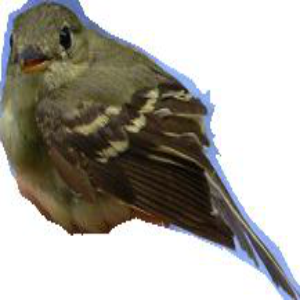

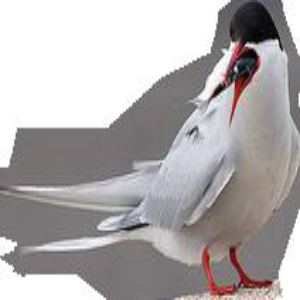

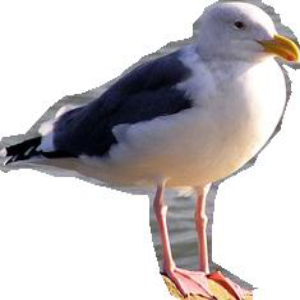

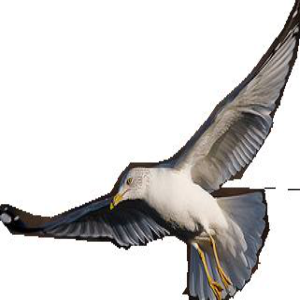

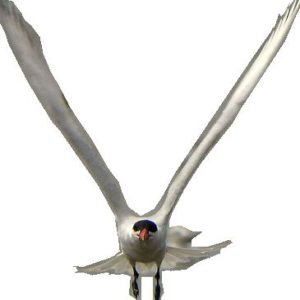

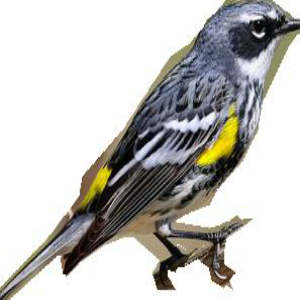

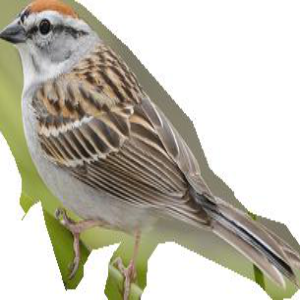

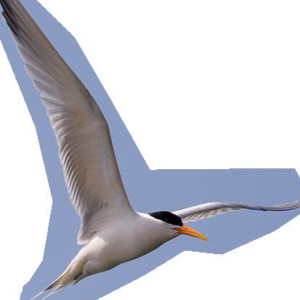

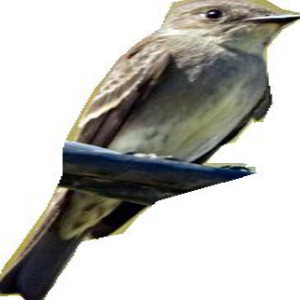

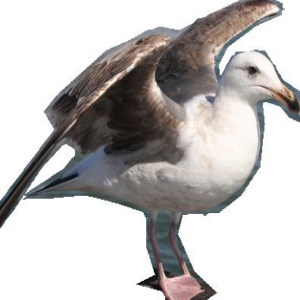

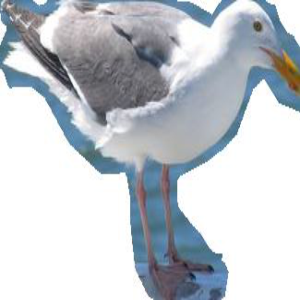

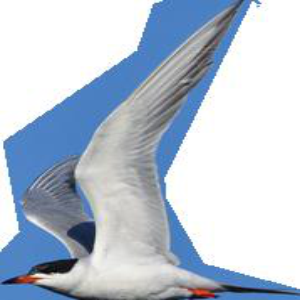

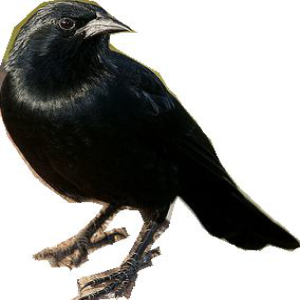

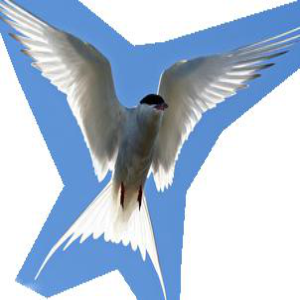

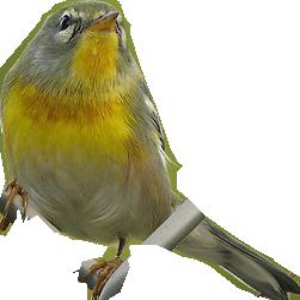

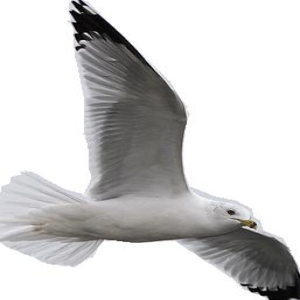

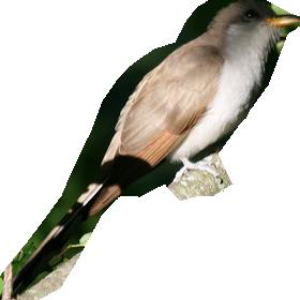

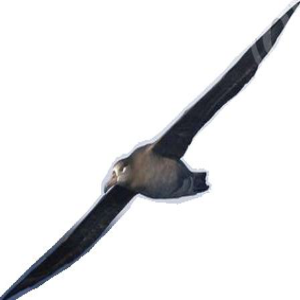

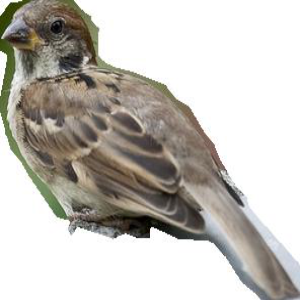

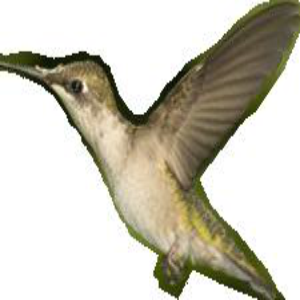

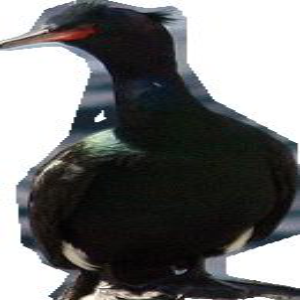

In [ ]:
i = 0
while i <= 20:
    display_image(wp[i]['feature']) 
    i += 1

In [46]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         6
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         5
           4       0.67      0.67      0.67         6
           5       1.00      0.67      0.80         6
           6       0.75      1.00      0.86         6
           7       0.60      0.60      0.60         5
           8       1.00      0.67      0.80         6
           9       0.80      0.67      0.73         6
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         6
          12       0.75      0.50      0.60         6
          13       1.00      0.83      0.91         6
          14       0.71      0.83      0.77         6
          15       0.75      0.50      0.60         6
          16       1.00      0.60      0.75         5
          17       0.86    

<hr>

## Now, new dataset consisting of approximately 3318 images and 20 classes will be used in order to prove that the previous dataset is dirty.

# New dataset - Model 1 (EfficientNet-B0, transfer Learning with the original gradients of the pre-trained model)

In [ ]:
data_dir = "./drive/MyDrive/d2_entire_dataset"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)

In [ ]:
train_dataset, test_dataset, val_dataset = train_test_validation2(dataset, dataset.targets)

In [ ]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Entire dataset size: {len(dataset)}")

Train dataset size: 2654
Validation dataset size: 328
Test dataset size: 336
Entire dataset size: 3318


In [ ]:
train_loader, val_loader, test_loader = loaders(16, train_dataset, val_dataset, test_dataset)

In [ ]:
# Test samples
sample_count(test_dataset.indices, test_dataset.dataset.targets)

0 -> 17
1 -> 19
2 -> 19
3 -> 14
4 -> 16
5 -> 14
6 -> 16
7 -> 19
8 -> 19
9 -> 14
10 -> 17
11 -> 17
12 -> 17
13 -> 16
14 -> 19
15 -> 18
16 -> 18
17 -> 17
18 -> 14
19 -> 16


#### Model (original gradients), optimizer and loss

In [ ]:
num_classes = 20
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=num_classes)

for param in model.parameters():
    param.requires_grad = False

model._fc = nn.Linear(model._fc.in_features, num_classes)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Loaded pretrained weights for efficientnet-b0


#### Training

In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 13
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/13 | Train loss: 0.0362 | Train accuracy: 0.8289
Epoch 1/13 | Validation loss: 0.0253 | Validation accuracy: 0.8811
Epoch 2/13 | Train loss: 0.0110 | Train accuracy: 0.9480
Epoch 2/13 | Validation loss: 0.0161 | Validation accuracy: 0.9177
Epoch 3/13 | Train loss: 0.0089 | Train accuracy: 0.9529
Epoch 3/13 | Validation loss: 0.0170 | Validation accuracy: 0.9177
Epoch 4/13 | Train loss: 0.0067 | Train accuracy: 0.9676
Epoch 4/13 | Validation loss: 0.0149 | Validation accuracy: 0.9299
Epoch 5/13 | Train loss: 0.0066 | Train accuracy: 0.9672
Epoch 5/13 | Validation loss: 0.0161 | Validation accuracy: 0.9177
Epoch 6/13 | Train loss: 0.0044 | Train accuracy: 0.9800
Epoch 6/13 | Validation loss: 0.0140 | Validation accuracy: 0.9360
Epoch 7/13 | Train loss: 0.0042 | Train accuracy: 0.9770
Epoch 7/13 | Validation loss: 0.0140 | Validation accuracy: 0.9421
Epoch 8/13 | Train loss: 0.0025 | Train accuracy: 0.9883
Epoch 8/13 | Validation loss: 0.0139 | Validation accuracy: 0.9421
Epoch 9/

In [ ]:
wp_nd = model_testing2(model)

Test loss: 0.0100 | Test accuracy: 0.9524


In [ ]:
print(f"The number of wrong predictions: {len(wp_nd)}")
print(f"The number of correct predictions: {len(test_dataset) - len(wp_nd)}")

The number of wrong predictions: 16
The number of correct predictions: 320


In [ ]:
lst

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

In [ ]:
represent_wrong_predictions(wp_nd, 15)

Wrong prediction 1: Actual class -> 5, Predicted class -> 19
Wrong prediction 2: Actual class -> 1, Predicted class -> 9
Wrong prediction 3: Actual class -> 4, Predicted class -> 1
Wrong prediction 4: Actual class -> 5, Predicted class -> 13
Wrong prediction 5: Actual class -> 5, Predicted class -> 19
Wrong prediction 6: Actual class -> 4, Predicted class -> 11
Wrong prediction 7: Actual class -> 4, Predicted class -> 10
Wrong prediction 8: Actual class -> 12, Predicted class -> 1
Wrong prediction 9: Actual class -> 9, Predicted class -> 1
Wrong prediction 10: Actual class -> 2, Predicted class -> 7
Wrong prediction 11: Actual class -> 12, Predicted class -> 7
Wrong prediction 12: Actual class -> 0, Predicted class -> 10
Wrong prediction 13: Actual class -> 16, Predicted class -> 9
Wrong prediction 14: Actual class -> 1, Predicted class -> 12
Wrong prediction 15: Actual class -> 9, Predicted class -> 7
Wrong prediction 16: Actual class -> 5, Predicted class -> 10


In [ ]:
import os
lst = os.listdir("./drive/MyDrive/d2_entire_dataset")
lst.sort()

In [ ]:
# Some of the wrong predictions
print(f"Wrong prediction 1: Actual class -> {lst[5]}, Predicted class -> {lst[19]}")
print(f"Wrong prediction 2: Actual class -> {lst[1]}, Predicted class -> {lst[9]}")
print(f"Wrong prediction 3: Actual class -> {lst[4]}, Predicted class -> {lst[1]}")
print(f"Wrong prediction 4: Actual class -> {lst[5]}, Predicted class -> {lst[13]}")
print(f"Wrong prediction 5: Actual class -> {lst[5]}, Predicted class -> {lst[19]}")
print(f"Wrong prediction 6: Actual class -> {lst[4]}, Predicted class -> {lst[11]}")
print(f"Wrong prediction 7: Actual class -> {lst[4]}, Predicted class -> {lst[10]}")

Wrong prediction 1: Actual class -> AFRICAN FIREFINCH, Predicted class -> AMERICAN KESTREL
Wrong prediction 2: Actual class -> ABBOTTS BOOBY, Predicted class -> ALBATROSS
Wrong prediction 3: Actual class -> AFRICAN EMERALD CUCKOO, Predicted class -> ABBOTTS BOOBY
Wrong prediction 4: Actual class -> AFRICAN FIREFINCH, Predicted class -> ALTAMIRA YELLOWTHROAT
Wrong prediction 5: Actual class -> AFRICAN FIREFINCH, Predicted class -> AMERICAN KESTREL
Wrong prediction 6: Actual class -> AFRICAN EMERALD CUCKOO, Predicted class -> ALEXANDRINE PARAKEET
Wrong prediction 7: Actual class -> AFRICAN EMERALD CUCKOO, Predicted class -> ALBERTS TOWHEE


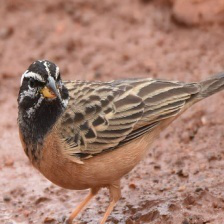

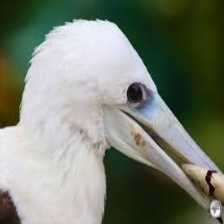

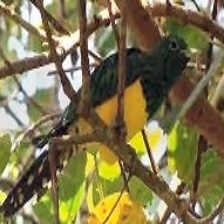

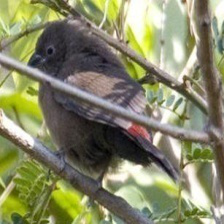

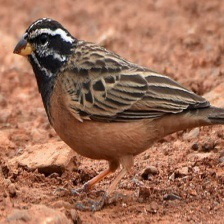

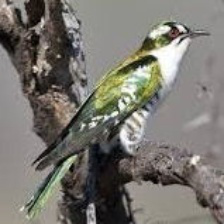

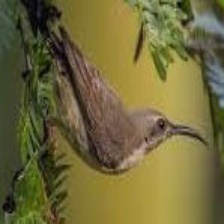

In [ ]:
i = 0
while i <= 6:
    display_image(wp_nd[i]['feature']) 
    i += 1

# New dataset - Model 2 (EfficientNet-B0, same procedure with Adam optimizer)

In [ ]:
num_classes = 20
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=num_classes)

for param in model.parameters():
    param.requires_grad = False

model._fc = nn.Linear(model._fc.in_features, num_classes)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

Loaded pretrained weights for efficientnet-b0


In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 13
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

model = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/13 | Train loss: 0.1678 | Train accuracy: 0.7905
Epoch 1/13 | Validation loss: 0.1545 | Validation accuracy: 0.8354
Epoch 2/13 | Train loss: 0.0979 | Train accuracy: 0.8892
Epoch 2/13 | Validation loss: 0.1301 | Validation accuracy: 0.8933
Epoch 3/13 | Train loss: 0.0897 | Train accuracy: 0.9133
Epoch 3/13 | Validation loss: 0.1426 | Validation accuracy: 0.9146
Epoch 4/13 | Train loss: 0.0774 | Train accuracy: 0.9341
Epoch 4/13 | Validation loss: 0.0687 | Validation accuracy: 0.9543
Epoch 5/13 | Train loss: 0.0971 | Train accuracy: 0.9213
Epoch 5/13 | Validation loss: 0.1048 | Validation accuracy: 0.9360
Epoch 6/13 | Train loss: 0.0570 | Train accuracy: 0.9570
Epoch 6/13 | Validation loss: 0.0806 | Validation accuracy: 0.9543
Epoch 7/13 | Train loss: 0.0444 | Train accuracy: 0.9619
Epoch 7/13 | Validation loss: 0.0703 | Validation accuracy: 0.9573
Epoch 8/13 | Train loss: 0.0327 | Train accuracy: 0.9695
Epoch 8/13 | Validation loss: 0.0652 | Validation accuracy: 0.9543
Epoch 9/

In [ ]:
model_testing(model)

Test loss: 0.0673 | Test accuracy: 0.9583


# New dataset - Model 3 (EfficientNet-B1, transfer Learning with the original gradients of the pre-trained model)

In [ ]:
num_classes = 20
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=num_classes)

for param in model.parameters():
    param.requires_grad = False

model._fc = nn.Linear(model._fc.in_features, num_classes)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Loaded pretrained weights for efficientnet-b1


In [ ]:
from torch.optim.lr_scheduler import StepLR

num_epochs = 13
scheduler = StepLR(optimizer, step_size = 5, gamma = 0.1)

model2 = training_with_decreasing_alpha(model, optimizer, criterion, num_epochs, scheduler)

Epoch 1/10 | Train loss: 0.0373 | Train accuracy: 0.8316
Epoch 1/10 | Validation loss: 0.0170 | Validation accuracy: 0.9268
Epoch 2/10 | Train loss: 0.0136 | Train accuracy: 0.9239
Epoch 2/10 | Validation loss: 0.0157 | Validation accuracy: 0.9238
Epoch 3/10 | Train loss: 0.0102 | Train accuracy: 0.9491
Epoch 3/10 | Validation loss: 0.0151 | Validation accuracy: 0.9329
Epoch 4/10 | Train loss: 0.0079 | Train accuracy: 0.9559
Epoch 4/10 | Validation loss: 0.0147 | Validation accuracy: 0.9360
Epoch 5/10 | Train loss: 0.0078 | Train accuracy: 0.9570
Epoch 5/10 | Validation loss: 0.0123 | Validation accuracy: 0.9390
Epoch 6/10 | Train loss: 0.0055 | Train accuracy: 0.9721
Epoch 6/10 | Validation loss: 0.0117 | Validation accuracy: 0.9482
Epoch 7/10 | Train loss: 0.0046 | Train accuracy: 0.9751
Epoch 7/10 | Validation loss: 0.0122 | Validation accuracy: 0.9512
Epoch 8/10 | Train loss: 0.0049 | Train accuracy: 0.9763
Epoch 8/10 | Validation loss: 0.0131 | Validation accuracy: 0.9512
Epoch 9/

In [ ]:
# Epoch 13, 14 and 15

Epoch 1/3 | Train loss: 0.0039 | Train accuracy: 0.9819
Epoch 1/3 | Validation loss: 0.0108 | Validation accuracy: 0.9482
Epoch 2/3 | Train loss: 0.0035 | Train accuracy: 0.9834
Epoch 2/3 | Validation loss: 0.0111 | Validation accuracy: 0.9482
Epoch 3/3 | Train loss: 0.0039 | Train accuracy: 0.9808
Epoch 3/3 | Validation loss: 0.0108 | Validation accuracy: 0.9482


In [ ]:
wp_nd2 = model_testing2(model2)

Test loss: 0.0118 | Test accuracy: 0.9345


In [ ]:
print(f"The number of wrong predictions: {len(wp_nd2)}")
print(f"The number of correct predictions: {len(test_dataset) - len(wp_nd2)}")

The number of wrong predictions: 22
The number of correct predictions: 314
